# <h1><center>MATH2319 - Machine Learning Course Project</center></h1>
<h2><center> Predicting the Credit Risk of the Customer</center></h2>

**Data Manipulators:**
+ Gayathri Jayabal(s3805886)
+ Jeyakaran Karnan(s3773303)
+ Sudharsan Seenivasa Raghavan(s3778243)

## Table of Contents
1. **[Introduction](#Introduction)**
    1. [Objective](#1A.-Objective)
    2. [Datasets](#1B.-Datasets)
2. **[Data Preprocessing](#Data-Preprocessing)**
    1. [Preliminary steps](#2A.-Preliminary-steps)
    2. [Data Cleaning and Transformation](#2B.-Data-Cleaning-and-Transformation)
    3. [Substituting original attributes](#2C.-Substituting-original-attributes)
3. **[Data Exploration](#Data-Exploration)**
    1. [Univariate Visualisation](#3A.-Univariate-Visualisation)
    2. [Bivariate Visualisation](#3B.-Bivariate-Visualisation)
    3. [Multivariate Visualisation](#3C.-Multivariate-Visualisation)
4. **[Predictive Modelling](#Predictive-Modelling)**
    1. [Methodology](#4A.-Methodology)
    2. [Encoding](#4B.-Encoding)
    3. [Scaling of features](#4C.-Scaling-of-features)
    4. [Feature Selection and Ranking](#4D.-Feature-Selection-and-Ranking)
    5. [Train-Test-Split Method](#4E.-Train-Test-Split-Method)
    6. [Model Evaluation Strategy](#4F.-Model-Evaluation-Strategy)
5. **[Hyperparameter Tuning](#Hyperparameter-Tuning)**
    1. [Random Forest Classifier](#5A.-Random-Forest-Classifier)
    2. [K-Nearest Neighbour(KNN)](#5B.-K-Nearest-Neighbour)
    3. [Decision Tree Classifier](#5C.-Decision-Tree-Classifier)
        1. [Fine Tuning](#5.C.a-Fine-Tuning)
    4. [Gaussian Naive Bayes](#5D.-Gaussian-Naive-Bayes)
    5. [Logistic Regression](#5E.-Logistic-Regression)
6. **[Performance Comparison](#Performance-Comparison)**
7. **[Limitations and Proposed Solutions](#Limitations-and-Proposed-Solutions)**
8. **[Summary](#Summary)**

## Chapter 1

## Introduction

### 1A. Objective

The main aim of this project is to predict the `Credit Risk` of the Individual. Being the most important part of the Banking Sector, predicting the customer's nature that affects the Credit Risk will help the bank to be cautious while lending out the money. Our dataset `(21 features)` showers us with a lot of insights about the customer's various nature that impacts the credit risk. Let us see how these descriptive features will help us to predict the value of our target variable `class` by joining hands with some of the amazing models of Machine Learning. With `1000 instances and 21 features` (including target feature) the dataset stands strong and very supportive to extract the prediction.

### 1B. Datasets

The dataset obtained from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data) contains 1000 instances and 21 features (`20 Descriptive and 1 Target`). All the attribute information used in the Project is taken from the [link](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data) given here. The dataset has been imported as credit. As a first step, we will be doing `Data preprocessing` by substituting the attributes with the attribute values given [here](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data). Then we will move into `Data exploration` where we will be inspecting the relation between the variables. Finally, we will be landing in `Data Modelling and Prediction` where we will be using our Machine Learning models. The **Target variable (Class)** contains binary values, Good and Bad, and we shall apply modeling concepts on it to understand which model will help us the best in predicting the value of the variable in future.  

## Chapter 2

## Data Preprocessing

### 2A. Preliminary steps

Warnings have been suppressed.

In [1]:
import warnings
warnings.filterwarnings('ignore')

The `Pandas and Numpy` packages have been imported using the usual naming conventions `pd and np` respectively. The dataset has been loaded explicitly into the variable **credit**.

In [2]:
import pandas as pd
import numpy as np

In [3]:
credit = pd.read_csv("credit.csv")
credit

checking_status  duration                    credit_history  \
0              '<0'         6  'critical/other existing credit'   
1        '0<=X<200'        48                   'existing paid'   
2     'no checking'        12  'critical/other existing credit'   
3              '<0'        42                   'existing paid'   
4              '<0'        24              'delayed previously'   
..              ...       ...                               ...   
995   'no checking'        12                   'existing paid'   
996            '<0'        30                   'existing paid'   
997   'no checking'        12                   'existing paid'   
998            '<0'        45                   'existing paid'   
999      '0<=X<200'        45  'critical/other existing credit'   

                 purpose  credit_amount      savings_status  employment  \
0               radio/tv           1169  'no known savings'       '>=7'   
1               radio/tv           5951              '<100'    '1<=X<4'   
2              education           2096              '<100'    '4<=X<7'   
3    furniture/equipment           7882              '<100'    '4<=X<7'   
4              'new car'           4870              '<100'    '1<=X<4'   
..                   ...            ...                 ...         ...   
995  furniture/equipment           1736              '<100'    '4<=X<7'   
996           'used car'           3857              '<100'    '1<=X<4'   
997             radio/tv            804              '<100'       '>=7'   
998             radio/tv           1845              '<100'    '1<=X<4'   
999           'used car'           4576        '100<=X<500'  unemployed   

     installment_commitment       personal_status other_parties  ...  \
0                         4         'male single'          none  ...   
1                         2  'female div/dep/mar'          none  ...   
2                         2         'male single'          none  ...   
3                         2         'male single'     guarantor  ...   
4                         3         'male single'          none  ...   
..                      ...                   ...           ...  ...   
995                       3  'female div/dep/mar'          none  ...   
996                       4        'male div/sep'          none  ...   
997                       4         'male single'          none  ...   
998                       4         'male single'          none  ...   
999                       3         'male single'          none  ...   

      property_magnitude age  other_payment_plans     housing  \
0          'real estate'  67                 none         own   
1          'real estate'  22                 none         own   
2          'real estate'  49                 none         own   
3       'life insurance'  45                 none  'for free'   
4    'no known property'  53                 none  'for free'   
..                   ...  ..                  ...         ...   
995        'real estate'  31                 none         own   
996     'life insurance'  40                 none         own   
997                  car  38                 none         own   
998  'no known property'  23                 none  'for free'   
999                  car  27                 none         own   

    existing_credits                          job num_dependents  \
0                  2                      skilled              1   
1                  1                      skilled              1   
2                  1         'unskilled resident'              2   
3                  1                      skilled              2   
4                  2                      skilled              2   
..               ...                          ...            ...   
995                1         'unskilled resident'              1   
996                1  'high qualif/self emp/mgmt'              1   
997                1                    

## 2B. Data Cleaning and Transformation

The primary inspection to walk through the **datatype of every attribute** helps us in getting an overall idea of cleaning it further. The dataset has **no missing values** but the values throughout the dataset have been covered with `irregular pattern of single quotes` such as some values have them and others don't. So we are removing it to polish the dataset.

In [4]:
credit.dtypes

checking_status           object
duration                   int64
credit_history            object
purpose                   object
credit_amount              int64
savings_status            object
employment                object
installment_commitment     int64
personal_status           object
other_parties             object
residence_since            int64
property_magnitude        object
age                        int64
other_payment_plans       object
housing                   object
existing_credits           int64
job                       object
num_dependents             int64
own_telephone             object
foreign_worker            object
class                     object
dtype: object

In [5]:
categorical_cols = ['checking_status',
                    'credit_history',
                    'purpose',
                    'savings_status',
                    'employment',
                    'personal_status',
                    'other_parties',
                   'property_magnitude',
                   'other_payment_plans',
                   'housing',
                   'job','own_telephone','foreign_worker']

for cols in categorical_cols:
    credit[cols] = credit[cols].str.replace("'", "")
    print('-------'+'\n'+cols)
    print(credit[cols].unique())

-------
checking_status
['<0' '0<=X<200' 'no checking' '>=200']
-------
credit_history
['critical/other existing credit' 'existing paid' 'delayed previously'
 'no credits/all paid' 'all paid']
-------
purpose
['radio/tv' 'education' 'furniture/equipment' 'new car' 'used car'
 'business' 'domestic appliance' 'repairs' 'other' 'retraining']
-------
savings_status
['no known savings' '<100' '500<=X<1000' '>=1000' '100<=X<500']
-------
employment
['>=7' '1<=X<4' '4<=X<7' 'unemployed' '<1']
-------
personal_status
['male single' 'female div/dep/mar' 'male div/sep' 'male mar/wid']
-------
other_parties
['none' 'guarantor' 'co applicant']
-------
property_magnitude
['real estate' 'life insurance' 'no known property' 'car']
-------
other_payment_plans
['none' 'bank' 'stores']
-------
housing
['own' 'for free' 'rent']
-------
job
['skilled' 'unskilled resident' 'high qualif/self emp/mgmt'
 'unemp/unskilled non res']
-------
own_telephone
['yes' 'none']
-------
foreign_worker
['yes' 'no']


By using the `unique()` function we can find out whether the attribute contains 
* any null values
* any insane values
* any duplicate values. 

So, we are running the unique() function in every attribute.

In [6]:
credit['duration'].unique()

array([ 6, 48, 12, 42, 24, 36, 30, 15,  9, 10,  7, 60, 18, 45, 11, 27,  8,
       54, 20, 14, 33, 21, 16,  4, 47, 13, 22, 39, 28,  5, 26, 72, 40],
      dtype=int64)

In [7]:
credit['installment_commitment'].unique()

array([4, 2, 3, 1], dtype=int64)

In [8]:
credit['residence_since'].unique()

array([4, 2, 3, 1], dtype=int64)

In [9]:
credit['age'].unique()

array([67, 22, 49, 45, 53, 35, 61, 28, 25, 24, 60, 32, 44, 31, 48, 26, 36,
       39, 42, 34, 63, 27, 30, 57, 33, 37, 58, 23, 29, 52, 50, 46, 51, 41,
       40, 66, 47, 56, 54, 20, 21, 38, 70, 65, 74, 68, 43, 55, 64, 75, 19,
       62, 59], dtype=int64)

In [10]:
credit['existing_credits'].unique()

array([2, 1, 3, 4], dtype=int64)

In [11]:
credit['num_dependents'].unique()

array([1, 2], dtype=int64)

Now, the dataframe `without the single quotes` is copied to another variable for future use.

In [12]:
credit_vis = credit.copy()
credit_vis

checking_status  duration                  credit_history  \
0                <0         6  critical/other existing credit   
1          0<=X<200        48                   existing paid   
2       no checking        12  critical/other existing credit   
3                <0        42                   existing paid   
4                <0        24              delayed previously   
..              ...       ...                             ...   
995     no checking        12                   existing paid   
996              <0        30                   existing paid   
997     no checking        12                   existing paid   
998              <0        45                   existing paid   
999        0<=X<200        45  critical/other existing credit   

                 purpose  credit_amount    savings_status  employment  \
0               radio/tv           1169  no known savings         >=7   
1               radio/tv           5951              <100      1<=X<4   
2              education           2096              <100      4<=X<7   
3    furniture/equipment           7882              <100      4<=X<7   
4                new car           4870              <100      1<=X<4   
..                   ...            ...               ...         ...   
995  furniture/equipment           1736              <100      4<=X<7   
996             used car           3857              <100      1<=X<4   
997             radio/tv            804              <100         >=7   
998             radio/tv           1845              <100      1<=X<4   
999             used car           4576        100<=X<500  unemployed   

     installment_commitment     personal_status other_parties  ...  \
0                         4         male single          none  ...   
1                         2  female div/dep/mar          none  ...   
2                         2         male single          none  ...   
3                         2         male single     guarantor  ...   
4                         3         male single          none  ...   
..                      ...                 ...           ...  ...   
995                       3  female div/dep/mar          none  ...   
996                       4        male div/sep          none  ...   
997                       4         male single          none  ...   
998                       4         male single          none  ...   
999                       3         male single          none  ...   

     property_magnitude age  other_payment_plans   housing existing_credits  \
0           real estate  67                 none       own                2   
1           real estate  22                 none       own                1   
2           real estate  49                 none       own                1   
3        life insurance  45                 none  for free                1   
4     no known property  53                 none  for free                2   
..                  ...  ..                  ...       ...              ...   
995         real estate  31                 none       own                1   
996      life insurance  40                 none       own                1   
997                 car  38                 none       own                1   
998   no known property  23                 none  for free                1   
999                 car  27                 none       own                1   

                           job num_dependents  own_telephone foreign_worker  \
0                      skilled              1            yes            yes   
1                      skilled              1           none            yes   
2           unskilled resident              2           none            yes   
3                      skilled              2           none            yes   
4                      skilled              2           none            yes   
..                         ...            ...            ...            ...   
995

## 2C. Substituting original attributes

The **Categorical** attributes in the dataset is substituted with the values from the original [page](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data).

In [13]:
credit['checking_status'].unique()

array(['<0', '0<=X<200', 'no checking', '>=200'], dtype=object)

In [14]:
x = {'<0':'A11','0<=X<200':'A12','no checking':'A14','>=200':'A13'}
credit['checking_status'] = credit['checking_status'].map(x)

In [15]:
credit['checking_status'].unique()

array(['A11', 'A12', 'A14', 'A13'], dtype=object)

In [16]:
credit['credit_history'].unique()

array(['critical/other existing credit', 'existing paid',
       'delayed previously', 'no credits/all paid', 'all paid'],
      dtype=object)

In [17]:
x = {'critical/other existing credit':'A34','delayed previously':'A33','existing paid':'A32','all paid':'A31', 'no credits/all paid':'A30'}
credit['credit_history'] = credit['credit_history'].map(x)

In [18]:
credit['credit_history'].unique()

array(['A34', 'A32', 'A33', 'A30', 'A31'], dtype=object)

In [19]:
credit['purpose'].unique()

array(['radio/tv', 'education', 'furniture/equipment', 'new car',
       'used car', 'business', 'domestic appliance', 'repairs', 'other',
       'retraining'], dtype=object)

In [20]:
x = {'radio/tv':'A43','education':'A46','furniture/equipment':'A42','new car':'A40', 'used car':'A41', 'business':'A49', 'domestic appliance':'A44', 'repairs':'A45', 'other':'A410','retraining':'A48'}
credit['purpose'] = credit['purpose'].map(x)

In [21]:
credit['purpose'].unique()

array(['A43', 'A46', 'A42', 'A40', 'A41', 'A49', 'A44', 'A45', 'A410',
       'A48'], dtype=object)

In [22]:
x = {'<100':'A61','100<=X<500':'A62','500<=X<1000':'A63','>=1000':'A64', 'no known savings':'A65'}
credit['savings_status'] = credit['savings_status'].map(x)

In [23]:
credit['savings_status'].unique()

array(['A65', 'A61', 'A63', 'A64', 'A62'], dtype=object)

In [24]:
credit['employment'].unique()

array(['>=7', '1<=X<4', '4<=X<7', 'unemployed', '<1'], dtype=object)

In [25]:
x = {'>=7':'A75','1<=X<4':'A73','4<=X<7':'A74','unemployed':'A71', '<1':'A72'}
credit['employment'] = credit['employment'].map(x)

In [26]:
credit['employment'].unique()

array(['A75', 'A73', 'A74', 'A71', 'A72'], dtype=object)

In [27]:
credit['personal_status'].unique()

array(['male single', 'female div/dep/mar', 'male div/sep',
       'male mar/wid'], dtype=object)

In [28]:
x = {'male single':'A93','female div/dep/mar':'A92','male div/sep':'A91','male mar/wid':'A94'}
credit['personal_status'] = credit['personal_status'].map(x)

In [29]:
credit['personal_status'].unique()

array(['A93', 'A92', 'A91', 'A94'], dtype=object)

In [30]:
credit['property_magnitude'].unique()

array(['real estate', 'life insurance', 'no known property', 'car'],
      dtype=object)

In [31]:
x = {'real estate':'A121','life insurance':'A122','no known property':'A124','car':'A123'}
credit['property_magnitude'] = credit['property_magnitude'].map(x)

In [32]:
credit['property_magnitude'].unique()

array(['A121', 'A122', 'A124', 'A123'], dtype=object)

In [33]:
credit['other_payment_plans'].unique()

array(['none', 'bank', 'stores'], dtype=object)

In [34]:
x = {'none':'A143','bank':'A141','stores':'A142'}
credit['other_payment_plans'] = credit['other_payment_plans'].map(x)

In [35]:
credit['other_payment_plans'].unique()

array(['A143', 'A141', 'A142'], dtype=object)

In [36]:
credit['housing'].unique()

array(['own', 'for free', 'rent'], dtype=object)

In [37]:
x = {'for free':'A153','own':'A152','rent':'A151'}
credit['housing'] = credit['housing'].map(x)

In [38]:
credit['housing'].unique()

array(['A152', 'A153', 'A151'], dtype=object)

In [39]:
credit['job'].unique()

array(['skilled', 'unskilled resident', 'high qualif/self emp/mgmt',
       'unemp/unskilled non res'], dtype=object)

In [40]:
x = {'skilled':'A173','unskilled resident':'A172','high qualif/self emp/mgmt':'A174', 'unemp/unskilled non res':'A171'}
credit['job'] = credit['job'].map(x)

In [41]:
credit['job'].unique()

array(['A173', 'A172', 'A174', 'A171'], dtype=object)

In [42]:
credit['own_telephone'].unique()

array(['yes', 'none'], dtype=object)

In [43]:
x = {'yes':'A192','none':'A191'}
credit['own_telephone'] = credit['own_telephone'].map(x)

In [44]:
credit['own_telephone'].unique()

array(['A192', 'A191'], dtype=object)

In [45]:
credit['foreign_worker'].unique()

array(['yes', 'no'], dtype=object)

In [46]:
x = {'yes':'A201','no':'A202'}
credit['foreign_worker'] = credit['foreign_worker'].map(x)

In [47]:
credit['foreign_worker'].unique()

array(['A201', 'A202'], dtype=object)

In [48]:
credit['other_parties'].unique()

array(['none', 'guarantor', 'co applicant'], dtype=object)

In [49]:
x = {'none':'A101','guarantor':'A103','co applicant':'A102'}
credit['other_parties'] = credit['other_parties'].map(x)

In [50]:
credit['other_parties'].unique()

array(['A101', 'A103', 'A102'], dtype=object)

In [51]:
credit.head(5)

checking_status  duration credit_history purpose  credit_amount  \
0             A11         6            A34     A43           1169   
1             A12        48            A32     A43           5951   
2             A14        12            A34     A46           2096   
3             A11        42            A32     A42           7882   
4             A11        24            A33     A40           4870   

  savings_status employment  installment_commitment personal_status  \
0            A65        A75                       4             A93   
1            A61        A73                       2             A92   
2            A61        A74                       2             A93   
3            A61        A74                       2             A93   
4            A61        A73                       3             A93   

  other_parties  ...  property_magnitude age  other_payment_plans housing  \
0          A101  ...                A121  67                 A143    A152   
1          A101  ...                A121  22                 A143    A152   
2          A101  ...                A121  49                 A143    A152   
3          A103  ...                A122  45                 A143    A153   
4          A101  ...                A124  53                 A143    A153   

  existing_credits   job num_dependents  own_telephone foreign_worker class  
0                2  A173              1           A192           A201  good  
1                1  A173              1           A191           A201   bad  
2                1  A172              2           A191           A201  good  
3                1  A173              2           A191           A201  good  
4                2  A173              2           A191           A201   bad  

[5 rows x 21 columns]

## Chapter 3

## Data Exploration

### 3A. Univariate Visualisation

Generally, Visualisation helps us to see the information in a detailed scope within a compact space. Visualising the data prior to analysis is an important step to be carried on. For Univariate visualisation, we can choose **scatter plots, Box plots, Q chart** for qualitative data and **bar graph, histogram and pie chart** for quantitative data. From Figure 1, the `people's property magnitude` has been displayed. From Figure 2, it is obvious that people who is `skilled` in their job has more participation. From Figure 3, the purpose for getting a money from a bank is picturized. Most of them need money for buying entertainment medium such as `Radio/TV`. Having the credit amount in the account plays a vital role in predicting the Credit risk of any selected individual. As the Figure 4 portrays, the `credit amount` between **0 to 5000** has higher frequency than others. 

In [52]:
%%capture
import seaborn as sns 
import matplotlib.pyplot as plt

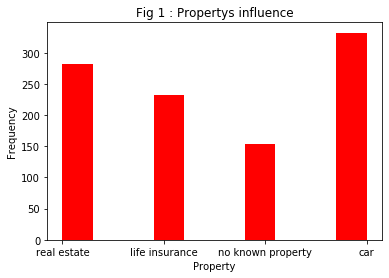

In [53]:
plt.hist(credit_vis['property_magnitude'], color = 'red')
plt.title('Fig 1 : Propertys influence')
plt.xlabel('Property')
plt.ylabel('Frequency')
plt.rcParams['figure.figsize'] = (10,6)
plt.show()

Text(0, 0.5, 'Frequency')

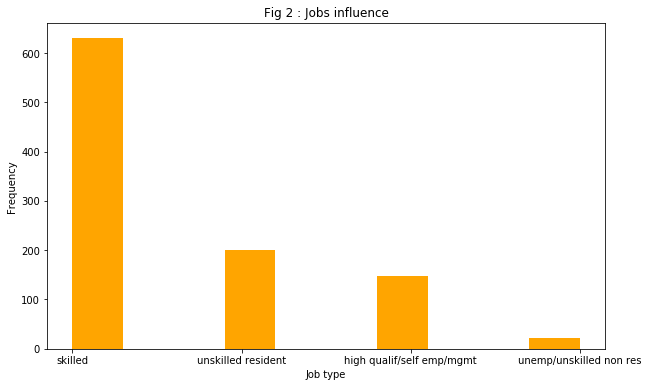

In [54]:
plt.hist(credit_vis['job'], color = 'orange')
plt.title('Fig 2 : Job''s influence')
plt.xlabel('Job type')
plt.ylabel('Frequency')

Text(0.5, 1, 'Fig 3:Purpose of Individuals')

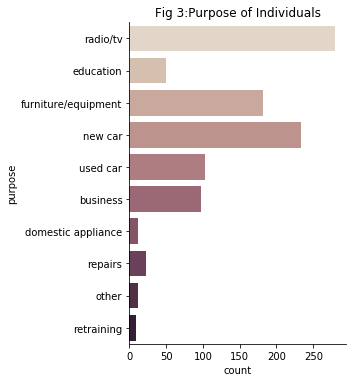

In [55]:
sns.catplot(y="purpose", kind="count",palette="ch:.25",dodge = "true", data = credit_vis,aspect =1.0)
plt.title('Fig 3:Purpose of Individuals')

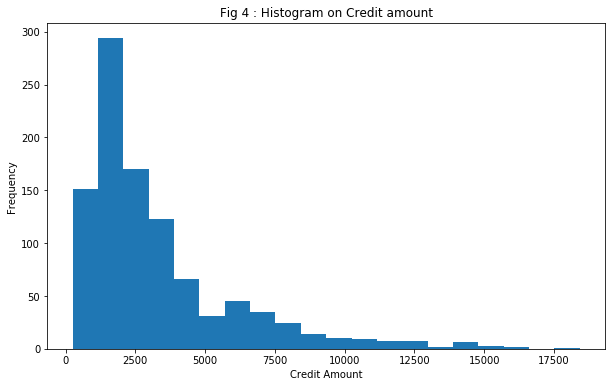

In [56]:
plt.hist(credit_vis['credit_amount'], bins=20) 
plt.title("Fig 4 : Histogram on Credit amount") 
plt.ylabel("Frequency") 
plt.xlabel("Credit Amount") 
plt.show()

### 3B. Bivariate Visualisation

**Bivariate visualisation** helps us to gain some inference from any **two variables** in the dataset. Gaining these kind of information will be really helpful in a way while designing and training the model. Lets see which are all the features affects the variance in the target variable the most. The variables `installment_commitment, age, existing_credits, personal_status` are taken to supervise the Target variable called `Class`. Here, we are looking against only the Target variable because it is important that how other variables in the dataset behaves well with the Target variable. From figure 5, we can infer that the people with `4 installments` have better credit risk than others. From Figure 6, we can derive that the `age group between 30-40` has better credit risk than other age group. From Figure 7, people with `1 existing credit` behave good with the credit risk. From Figure 8, `Male singles` who is referred as Male bachelors are good at paying back the money.

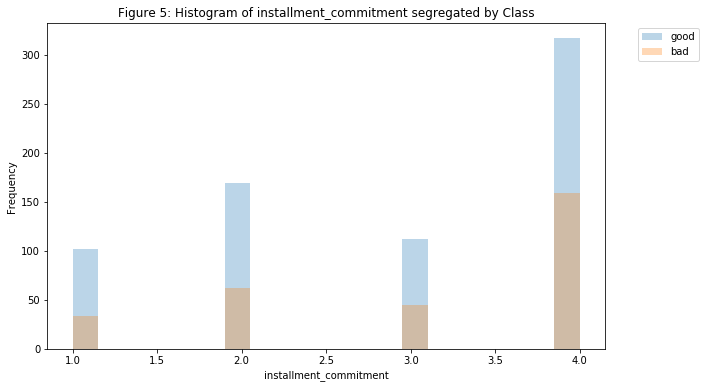

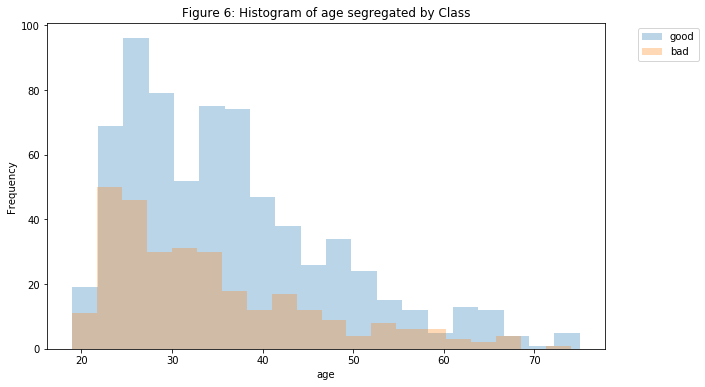

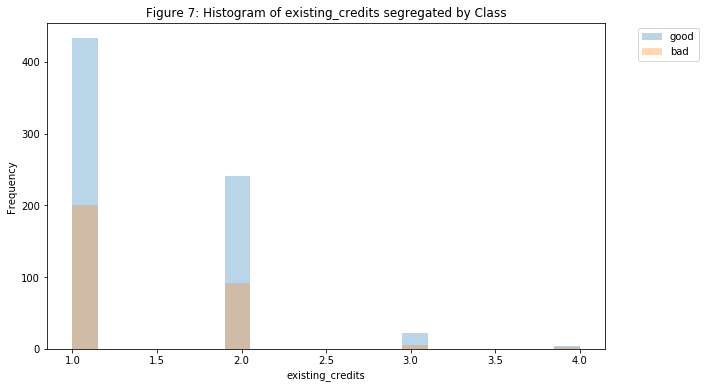

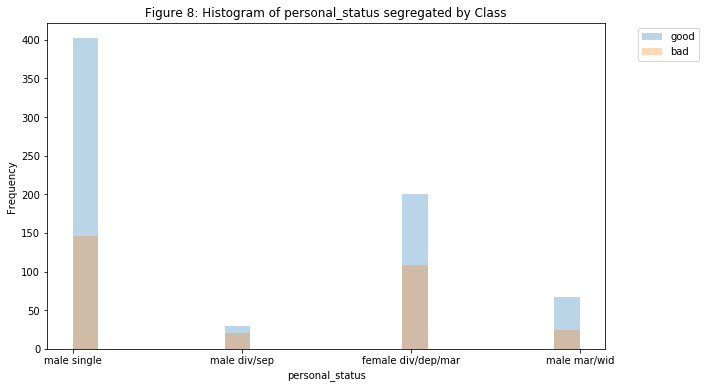

In [57]:
i=5
for col in ['installment_commitment','age','existing_credits','personal_status']: 
    data1 = credit_vis.loc[credit_vis['class']=="good", col] 
    data2 = credit_vis.loc[credit_vis['class']=="bad", col] 
    plt.hist(data1, alpha = 0.3, bins = 20) 
    plt.hist(data2, alpha = 0.3, bins = 20) 
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title("Figure " + str(i) + ": Histogram of " + col + " segregated by Class") 
    i = i + 1 
    plt.legend(credit_vis['class'].unique(), bbox_to_anchor=(1.05, 1), loc=2, borderpad = 0.4)
    plt.show()


### 3C. Multivariate Visualisation

**Multivariate visualisation** analyzes multiple data dimensions or attributes (2 or more). Multivariate visualisation involves checking out distributions and other potential relationships, patterns and correlations amongst these attributes. In the following four visualisations below, the relationships between a couple of continuous variables and the target variable have been visualisations to aid us in making better decisions for modeling later. Box plots between `job` and `age`involving the target variable, `class`, and `existing_credits`, `credit_amount`involving the target variable again can be seen. Further a heat map to analyze the correlational values between multiple numeric variables and a scatter plot of `duration` vs `credit_amount`involving the `class` can also seen below.

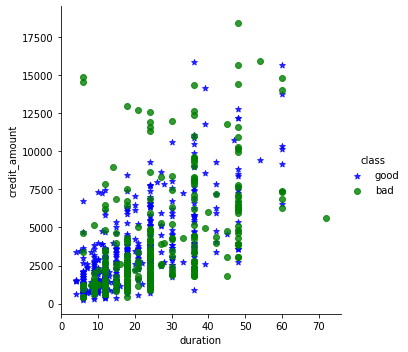

In [58]:
import seaborn as sns

sns.lmplot(x='duration', y='credit_amount', hue='class', markers=['*', 'o'],
            data= credit_vis.loc[credit['class'].isin(['good', 'bad'])], palette=dict(good="b", bad="g"), 
           fit_reg = False, 
           legend_out = True)

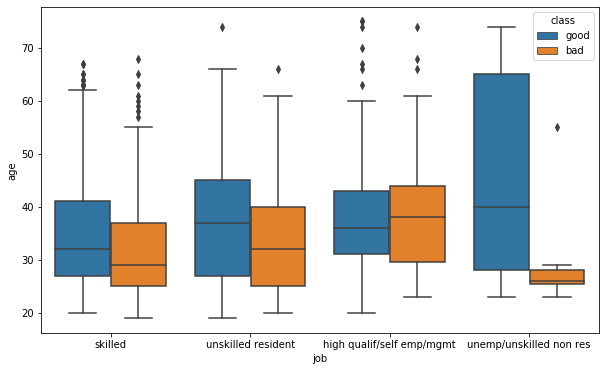

In [59]:
sns.boxplot(x="job", y="age", hue="class", data=credit_vis)

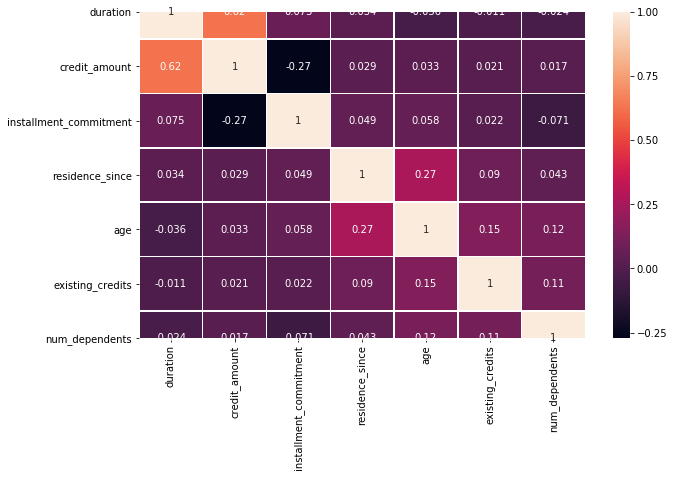

In [60]:
import seaborn as sns
sns.heatmap(credit_vis.corr(), annot = True,linewidths=.5)


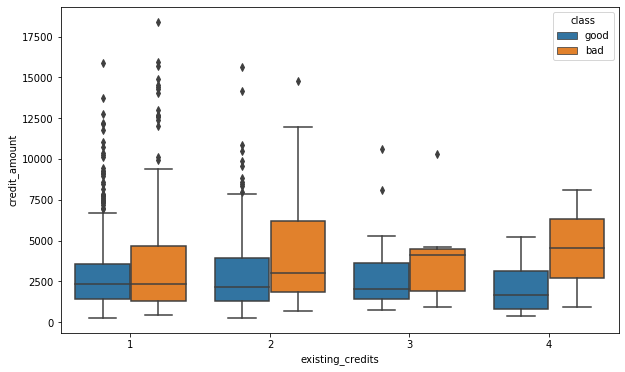

In [61]:
sns.boxplot(x="existing_credits", y="credit_amount", hue="class", data=credit_vis)

## Chapter 4

## Predictive Modelling

### 4A. Methodology

We are moving to the next process called Predictive Modelling. We build the following models to predict the target feature,
+ K-Nearest Neighbors (KNN)
+ Decision trees (DT)
+ Naive Bayes (NB)
+ Random Forest Classifier
+ Logistic Regression 

The Dataset is divided into two seperate dataframes with `descriptive features into one and Target feature into one`. Encoding is happening all through out the dataset including `Target feature`. Encoding is done to convert all the categorical values into numerical one because only the numerical values fit into any selected classifier model. **Scaling** is done to **improvise** the efficiency of the outcome. The `train-test-split` comes into action with `70% of training set and 30% of test set`. The idea is that more training data makes the classification model better whilst more test data makes the error estimate more accurate. The `selection of best features` takes place by using Random Forest method. After this step only the best features are taken into training set.  `Cross validation and Paired t-test` is carried on the test data to check whether the model is significant enough or not.

### 4B. Encoding

The descriptive featues and Target feature are placed in  separate variables. We assign the **Target variable** called Class to the variable `target`. All the other descriptive features are placed in the variable called `Data`. The target feature is label Encoded as `1 and 0` for good and bad respectively. The other descriptive features are also encoded as numerical values. The encoding which we did for categorical variables is called as **one hot encoding**.

In [62]:
Data = credit.drop(columns = 'class')

target = credit['class'].values

In [63]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le_fit = le.fit(target)

target = np.where(target=='good', 1, 0)

In [64]:
np.unique(target, return_counts = True)


(array([0, 1]), array([300, 700], dtype=int64))

In [65]:
cat_cols = Data.columns[Data.dtypes==object].tolist()
cat_cols

['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment',
 'personal_status',
 'other_parties',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'job',
 'own_telephone',
 'foreign_worker']

In [66]:
for col in cat_cols:
    n = len(Data[col].unique())
    if (n == 2):
        Data[col] = pd.get_dummies(Data[col], drop_first=True)

Here you can see the dataset encoded completely.

In [67]:
credit_onehot = pd.get_dummies(Data)
credit_onehot

duration  credit_amount  installment_commitment  residence_since  age  \
0           6           1169                       4                4   67   
1          48           5951                       2                2   22   
2          12           2096                       2                3   49   
3          42           7882                       2                4   45   
4          24           4870                       3                4   53   
..        ...            ...                     ...              ...  ...   
995        12           1736                       3                4   31   
996        30           3857                       4                4   40   
997        12            804                       4                4   38   
998        45           1845                       4                4   23   
999        45           4576                       3                4   27   

     existing_credits  num_dependents  own_telephone  foreign_worker  \
0                   2               1              1               0   
1                   1               1              0               0   
2                   1               2              0               0   
3                   1               2              0               0   
4                   2               2              0               0   
..                ...             ...            ...             ...   
995                 1               1              0               0   
996                 1               1              1               0   
997                 1               1              0               0   
998                 1               1              1               0   
999                 1               1              0               0   

     checking_status_A11  ...  other_payment_plans_A141  \
0                      1  ...                         0   
1                      0  ...                         0   
2                      0  ...                         0   
3                      1  ...                         0   
4                      1  ...                         0   
..                   ...  ...                       ...   
995                    0  ...                         0   
996                    1  ...                         0   
997                    0  ...                         0   
998                    1  ...                         0   
999                    0  ...                         0   

     other_payment_plans_A142  other_payment_plans_A143  housing_A151  \
0                           0                         1             0   
1                           0                         1             0   
2                           0                         1             0   
3                           0                         1             0   
4                           0                         1             0   
..                        ...                       ...           ...   
995                         0                         1             0   
996                         0                         1             0   
997                         0                         1             0   
998                         0                         1             0   
999                         0                         1             0   

     housing_A152  housing_A153  job_A171  job_A172  job_A173  job_A174  
0               1             0         0         0         1         0  
1               1             0         0         0         1         0  
2               1             0         0         1         0         0  
3               0             1         0         0         1         0  
4               0             1         0         0         1         0  
..            ...           ...       ...       ...       ...       ...  
995             1             0         0         1         0         0  
996             1        

### 4C. Scaling of features

Every value in the encoded data are scaled between the range of **0 to 1**. The model will throw us with even more **accuracy** if we have values under one range.

In [68]:
data_encoded = credit_onehot.copy()
data_encoded_scaling = preprocessing.StandardScaler().fit_transform(data_encoded.astype(float))
data_standardscaling = pd.DataFrame(data_encoded_scaling,columns = credit_onehot.columns)
data_standardscaling.head()

duration  credit_amount  installment_commitment  residence_since       age  \
0 -1.236478      -0.745131                0.918477         1.046987  2.766456   
1  2.248194       0.949817               -0.870183        -0.765977 -1.191404   
2 -0.738668      -0.416562               -0.870183         0.140505  1.183312   
3  1.750384       1.634247               -0.870183         1.046987  0.831502   
4  0.256953       0.566664                0.024147         1.046987  1.535122   

   existing_credits  num_dependents  own_telephone  foreign_worker  \
0          1.027079       -0.428290       1.214598       -0.196014   
1         -0.704926       -0.428290      -0.823318       -0.196014   
2         -0.704926        2.334869      -0.823318       -0.196014   
3         -0.704926        2.334869      -0.823318       -0.196014   
4          1.027079        2.334869      -0.823318       -0.196014   

   checking_status_A11  ...  other_payment_plans_A141  \
0             1.627770  ...                 -0.401796   
1            -0.614337  ...                 -0.401796   
2            -0.614337  ...                 -0.401796   
3             1.627770  ...                 -0.401796   
4             1.627770  ...                 -0.401796   

   other_payment_plans_A142  other_payment_plans_A143  housing_A151  \
0                 -0.222076                  0.478018     -0.466933   
1                 -0.222076                  0.478018     -0.466933   
2                 -0.222076                  0.478018     -0.466933   
3                 -0.222076                  0.478018     -0.466933   
4                 -0.222076                  0.478018     -0.466933   

   housing_A152  housing_A153  job_A171  job_A172  job_A173  job_A174  
0      0.634448     -0.347960 -0.149983      -0.5  0.766356 -0.416784  
1      0.634448     -0.347960 -0.149983      -0.5  0.766356 -0.416784  
2      0.634448     -0.347960 -0.149983       2.0 -1.304877 -0.416784  
3     -1.576173      2.873893 -0.149983      -0.5  0.766356 -0.416784  
4     -1.576173      2.873893 -0.149983      -0.5  0.766356 -0.416784  

[5 rows x 59 columns]

In [69]:
credit_clean = data_standardscaling.copy()

In [70]:
credit_clean.insert(59, 'Target', target)


Final cleaned dataset will be stored under the variable `credit_clean`.

In [71]:
credit_clean.head(5)

duration  credit_amount  installment_commitment  residence_since       age  \
0 -1.236478      -0.745131                0.918477         1.046987  2.766456   
1  2.248194       0.949817               -0.870183        -0.765977 -1.191404   
2 -0.738668      -0.416562               -0.870183         0.140505  1.183312   
3  1.750384       1.634247               -0.870183         1.046987  0.831502   
4  0.256953       0.566664                0.024147         1.046987  1.535122   

   existing_credits  num_dependents  own_telephone  foreign_worker  \
0          1.027079       -0.428290       1.214598       -0.196014   
1         -0.704926       -0.428290      -0.823318       -0.196014   
2         -0.704926        2.334869      -0.823318       -0.196014   
3         -0.704926        2.334869      -0.823318       -0.196014   
4          1.027079        2.334869      -0.823318       -0.196014   

   checking_status_A11  ...  other_payment_plans_A142  \
0             1.627770  ...                 -0.222076   
1            -0.614337  ...                 -0.222076   
2            -0.614337  ...                 -0.222076   
3             1.627770  ...                 -0.222076   
4             1.627770  ...                 -0.222076   

   other_payment_plans_A143  housing_A151  housing_A152  housing_A153  \
0                  0.478018     -0.466933      0.634448     -0.347960   
1                  0.478018     -0.466933      0.634448     -0.347960   
2                  0.478018     -0.466933      0.634448     -0.347960   
3                  0.478018     -0.466933     -1.576173      2.873893   
4                  0.478018     -0.466933     -1.576173      2.873893   

   job_A171  job_A172  job_A173  job_A174  Target  
0 -0.149983      -0.5  0.766356 -0.416784       1  
1 -0.149983      -0.5  0.766356 -0.416784       0  
2 -0.149983       2.0 -1.304877 -0.416784       1  
3 -0.149983      -0.5  0.766356 -0.416784       1  
4 -0.149983      -0.5  0.766356 -0.416784       0  

[5 rows x 60 columns]

### 4D. Feature Selection and Ranking

**Random forest** can be used to select the best features in the dataset. With its simplicity and ease in the performance it creates `decision tree and predicts the best solution` based on each tree. The selected features through this Random forest model and later these features are used to fit in the model.

In [72]:
from sklearn.ensemble import RandomForestClassifier

num_features = 10
model_rfi = RandomForestClassifier(n_estimators=100, random_state=999)
model_rfi.fit(data_encoded, target)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]

best_features_rfi = data_encoded.columns[fs_indices_rfi].values
best_features_rfi

array(['credit_amount', 'age', 'duration', 'checking_status_A14',
       'installment_commitment', 'checking_status_A11', 'residence_since',
       'savings_status_A61', 'credit_history_A34', 'purpose_A40'],
      dtype=object)

In [73]:
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
feature_importances_rfi

array([0.10278397, 0.08216811, 0.08195924, 0.05667467, 0.03575125,
       0.03390708, 0.03344957, 0.020316  , 0.01960295, 0.01928142])

In [74]:
%%capture
!pip install --upgrade altair

!pip install vega vega_datasets

import altair as alt

In [75]:
alt.renderers.enable('html') # required in Jupyter notebooks

def plot_imp(best_features, scores, method_name, color):
    
    df = pd.DataFrame({'features': best_features, 
                       'importances': scores})
    
    fig, ax = plt.subplots(figsize =(15,5))
    g= sns.barplot(ax=ax, x = "features" , y = "importances" , data= df)
    g.set_xticklabels(ax.get_xticklabels(),rotation = 30)
   

The important features are visualized to see the best view.

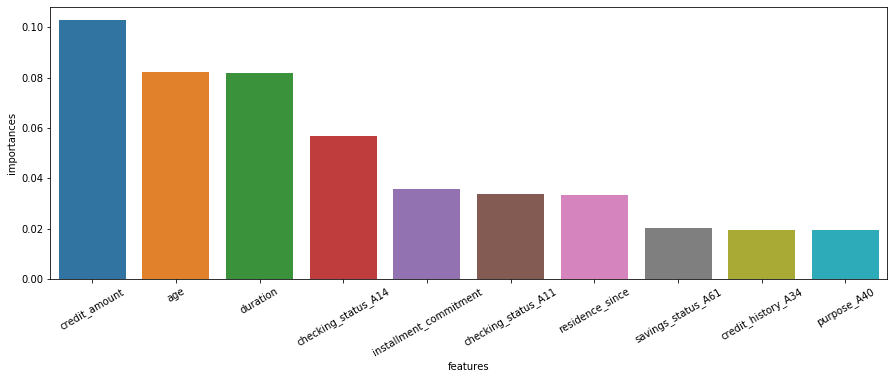

In [76]:
plot_imp(best_features_rfi, feature_importances_rfi, 'Random Forest', 'red')

It is obvious from the plot that the most important feature is `Credit amount` followed by age and duration.

### 4E. Train-Test-Split Method

The total dataset is divided into `70% of train data and 30% of test data`. The train data fits into any model and the result is checked against test data to see the how trained data and test data match.

In [77]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import feature_selection as fs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [78]:
import numpy as np
target = credit_clean['Target']
Data_numpy = credit_clean.drop(columns = 'Target')
Data = Data_numpy.values
D_train, D_test, t_train, t_test = train_test_split(Data, 
                                                    target.values, 
                                                    test_size=0.3, 
                                                    random_state=999)

In [79]:
print(D_train.shape)
print(D_test.shape)
print(t_train.shape)
print(t_test.shape)

(700, 59)
(300, 59)
(700,)
(300,)


The best feature is stored into another variable by subsetting from the selected train and test data.

In [80]:
D_Train_fs = D_train[:, fs_indices_rfi]
D_Test_fs  = D_test[:, fs_indices_rfi]

### 4F. Model Evaluation Strategy

The training data is trained using a certain strategy and the outcome is predicted by matching it with the test data. Here, we are using `Stratified Cross-Evaluation` strategy with **5 folds and 2 repititions** for hyperparameter tuning.

In [81]:
from sklearn.model_selection import RepeatedStratifiedKFold,GridSearchCV
cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats = 2, random_state=999)

## Chapter 5

## Hyperparameter Tuning

### 5A. Random Forest Classifier

The ability to precisely classify the observations is extremely valuable for top business applications. Such kind of algorithm is **Random Forest classifier**. Random Forest Classifier is passed with the maximum depth `5, 7, 10, 12` and estimators with `100, 250, 400, 500`. The train and test dataset are taken from the `best features` to bring out the best prediction possible.

In [82]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV

from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.model_selection import StratifiedKFold, GridSearchCV

scoring_metric = 'roc_auc'


rf_classifier = RandomForestClassifier(random_state=999)

params_RF = {'n_estimators': [100, 250, 400, 500],
             'max_depth': [5, 7, 10, 12]}

gs_RF = GridSearchCV(estimator=rf_classifier, 
                     param_grid=params_RF, 
                     cv=cv_method,
                     verbose=1,
                     n_jobs=-2,
                     scoring=scoring_metric)

gs_RF.fit(D_Train_fs, t_train);

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-2)]: Done 160 out of 160 | elapsed:   22.4s finished


In Random forest, the best parameters are computed with **maximum depth as 5** and **n-estimators as 250**.

In [83]:
gs_RF.best_params_

{'max_depth': 5, 'n_estimators': 250}

The optimal Random Forest classifier is given with a value **0.761**.

In [84]:
gs_RF.best_score_.round(3)

0.763

In [85]:
results_RF = pd.DataFrame(gs_RF.cv_results_['params'])
results_RF['test_score'] = gs_RF.cv_results_['mean_test_score']
results_RF.columns

Index(['max_depth', 'n_estimators', 'test_score'], dtype='object')

The results are visualised in a plot.

In [86]:
alt.Chart(results_RF, 
          title='RF Performance Comparison'
         ).mark_line(point=True).encode(
    alt.X('max_depth', title='Maximum Depth'),
    alt.Y('test_score', title='Mean CV Score', scale=alt.Scale(zero=False)),
    color='n_estimators:N' # N is for nominal
)

alt.Chart(...)

### 5B. K Nearest Neighbour

**K-Nearest Neighbour** is one of the simplest method that the training set is placed between the set of neighbours so that the nearest neighbour will become the predicted value. The parameters of the model with neighbours ranging from **[1, 5, 10, 15, 20, 25, 30]** and p-value as **[1, 2]**.

In [87]:
import numpy as np
params_KNN = {'n_neighbors': [1, 5, 10, 15, 20, 25, 30], 'p': [1, 2]}

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


gs_KNN = GridSearchCV(estimator=KNeighborsClassifier(), 
                      param_grid=params_KNN, 
                      cv=cv_method,
                      verbose=1,
                      scoring=scoring_metric)

In [89]:
gs_KNN.fit(D_Train_fs, t_train);

Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.6s finished


The best parameter of the model is derived with `neighbours as 30 and p-value as 2`.

In [90]:
gs_KNN.best_params_

{'n_neighbors': 30, 'p': 2}

The optimal score of KNN classifier is given with a value 0.747.

In [91]:
gs_KNN.best_score_.round(3)

0.743

In [92]:
gs_KNN.cv_results_['mean_test_score']

array([0.58305109, 0.58178897, 0.69294726, 0.70550482, 0.71374874,
       0.72065598, 0.72657115, 0.73406762, 0.72458833, 0.7310349 ,
       0.72727791, 0.73610015, 0.73457081, 0.74332223])

In [93]:
results_KNN = pd.DataFrame(gs_KNN.cv_results_['params'])

In [94]:
results_KNN['test_score'] = gs_KNN.cv_results_['mean_test_score']


All the parameters of **KNN model** is tabulated below:

In [95]:
results_KNN['metric'] = results_KNN['p'].replace([1,2], ["Manhattan", "Euclidean"])
results_KNN

n_neighbors  p  test_score     metric
0             1  1    0.583051  Manhattan
1             1  2    0.581789  Euclidean
2             5  1    0.692947  Manhattan
3             5  2    0.705505  Euclidean
4            10  1    0.713749  Manhattan
5            10  2    0.720656  Euclidean
6            15  1    0.726571  Manhattan
7            15  2    0.734068  Euclidean
8            20  1    0.724588  Manhattan
9            20  2    0.731035  Euclidean
10           25  1    0.727278  Manhattan
11           25  2    0.736100  Euclidean
12           30  1    0.734571  Manhattan
13           30  2    0.743322  Euclidean

In [96]:
import altair as alt

alt.Chart(results_KNN, 
          title='KNN Performance Comparison'
         ).mark_line(point=True).encode(
    alt.X('n_neighbors', title='Number of Neighbors'),
    alt.Y('test_score', title='Mean CV Score', scale=alt.Scale(zero=False)),
    color='metric'
)

alt.Chart(...)

### 5C. Decision Tree Classifier

We are going to apply one of the best classification method which is `Decision Tree Classifier`. Generally, Decision Tree will seperate all the features in the form of tree. We will tell the model with varying depths and maximum samples split. So, we will be getting the best depth and best score to frame the model with. 

In [97]:
from sklearn.tree import DecisionTreeClassifier

df_classifier = DecisionTreeClassifier(random_state=999)

params_DT = {'max_depth': [3,4,5,6],
             'min_samples_split': [3,6,9,10,15]}
            
gs_DT = GridSearchCV(estimator=df_classifier, 
                     param_grid=params_DT, 
                     cv=cv_method,
                     verbose=1, 
                     scoring=scoring_metric)

gs_DT.fit(D_Train_fs, t_train);

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.4s finished


Decision Tree model will provide the best result with **depth 4 and 15 splits**.

In [98]:
gs_DT.best_params_

{'max_depth': 4, 'min_samples_split': 15}

The best score of Decision Tree model is **0.706**. Currently, this model score is slightly lesser than the KNN model. But only after computing `Paired T-Test` on various combination we can conclude the best model.

In [99]:
gs_DT.best_score_.round(3)

0.71

In [100]:
results_DT = pd.DataFrame(gs_DT.cv_results_['params'])
results_DT['test_score'] = gs_DT.cv_results_['mean_test_score']
results_DT.columns

Index(['max_depth', 'min_samples_split', 'test_score'], dtype='object')

In [101]:
results_DT

max_depth  min_samples_split  test_score
0           3                  3    0.703714
1           3                  6    0.702853
2           3                  9    0.702230
3           3                 10    0.702230
4           3                 15    0.702230
5           4                  3    0.707350
6           4                  6    0.707578
7           4                  9    0.706181
8           4                 10    0.706181
9           4                 15    0.710476
10          5                  3    0.688827
11          5                  6    0.689161
12          5                  9    0.690102
13          5                 10    0.693478
14          5                 15    0.696133
15          6                  3    0.687357
16          6                  6    0.687613
17          6                  9    0.690687
18          6                 10    0.694402
19          6                 15    0.694356

In [102]:
alt.Chart(results_DT, 
          title='DT Performance Comparison'
         ).mark_line(point=True).encode(
    alt.X('max_depth', title='Maximum Depth'),
    alt.Y('test_score', title='Mean CV Score', scale=alt.Scale(zero=False)),
    color='min_samples_split:N' # N is for nominal
)

alt.Chart(...)

### 5.C.a Fine Tuning

As Decision Tree has recorded, the minimum score so far **fine tuning** is necessary here. Further we try not to miss out any best values. So, we are passing out new parameters for Decision Tree,

In [161]:
from sklearn.tree import DecisionTreeClassifier

df_classifier = DecisionTreeClassifier(random_state=999)

params_DT = {'max_depth': [10,15,20,25],
             'min_samples_split': [50,100,150,200,250]}
            
gs_DT2 = GridSearchCV(estimator=df_classifier, 
                     param_grid=params_DT, 
                     cv=cv_method,
                     verbose=1, 
                     scoring=scoring_metric)

gs_DT2.fit(D_Train_fs, t_train);

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.3s finished


In [162]:
gs_DT2.best_params_

{'max_depth': 10, 'min_samples_split': 150}

In [163]:
gs_DT2.best_score_.round(3)

0.712

As we speculate, there is a slight improvement in the score. We got **0.712** as the best score with **10 as maximum depth and 150 minimum splits**.

In [164]:
results_DT = pd.DataFrame(gs_DT2.cv_results_['params'])
results_DT['test_score'] = gs_DT2.cv_results_['mean_test_score']
results_DT.columns

Index(['max_depth', 'min_samples_split', 'test_score'], dtype='object')

In [165]:
results_DT

max_depth  min_samples_split  test_score
0          10                 50    0.701397
1          10                100    0.699390
2          10                150    0.712498
3          10                200    0.706593
4          10                250    0.708294
5          15                 50    0.701147
6          15                100    0.699390
7          15                150    0.712498
8          15                200    0.706593
9          15                250    0.708294
10         20                 50    0.701147
11         20                100    0.699390
12         20                150    0.712498
13         20                200    0.706593
14         20                250    0.708294
15         25                 50    0.701147
16         25                100    0.699390
17         25                150    0.712498
18         25                200    0.706593
19         25                250    0.708294

In [166]:
alt.Chart(results_DT, 
          title='DT Performance Comparison'
         ).mark_line(point=True).encode(
    alt.X('max_depth', title='Maximum Depth'),
    alt.Y('test_score', title='Mean CV Score', scale=alt.Scale(zero=False)),
    color='min_samples_split:N' # N is for nominal
)

alt.Chart(...)

### 5D. Gaussian Naive Bayes

Naive Bayes is the one of the model which works well on large dataset. It works on **Bayes theorem** of probability to predict the class of unknown data sets. The prediction is done by calculating the probabilities of each attribute. In simple terms, a Naive Bayes classifier assumes that `the presence of a particular feature in a class is unrelated to the presence of any other feature`. Power transformation is performed on the train set before fitting into the model. The assumption is made as independent among predictors.

In [109]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PowerTransformer

nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(1,-2, num=40)}

gs_NB = GridSearchCV(estimator=nb_classifier, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring=scoring_metric)

D_Train_fs_transformed = PowerTransformer().fit_transform(D_Train_fs)

gs_NB.fit(D_Train_fs_transformed, t_train);

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.7s finished


In [110]:
gs_NB.best_params_

{'var_smoothing': 0.020309176209047347}

The optimal **Naive Bayes** yields the score of `0.764`.

In [111]:
gs_NB.best_score_.round(3)

0.764

In [112]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

In [113]:
alt.Chart(results_NB, 
          title='NB Performance Comparison'
         ).mark_line(point=True).encode(
    alt.X('var_smoothing', title='Var. Smoothing'),
    alt.Y('test_score', title='Mean CV Score', scale=alt.Scale(zero=False))
).interactive()

alt.Chart(...)

### 5E. Logistic Regression

In Statistics, **Logistic Regression** is used to predict certain class or event such as *0 or 1, pass or fail, alive or dead*. So here we are going to predict that the person has good credit risk or not, we thought the model would be a correct fit to this project. Logistic regression is a statistical model that uses a `logistic function` to model a `binary dependent variable` in its basic form, though there are several more complex extensions. Logistic regression determines the parameters of a logistic model (a type of discrete regression) in regression analysis.

In [114]:
from sklearn.linear_model import LogisticRegression

In [115]:
params_logreg={'solver':['newton-cg','lbfgs','liblinear','sag','saga'],
             'C':[1,2]}

In [116]:
logreg=GridSearchCV(estimator=LogisticRegression(),
                param_grid=params_logreg,
                cv=cv_method,
                scoring=scoring_metric)

In [117]:
logreg.fit(D_Train_fs_transformed, t_train);

In [118]:
logreg.best_params_

{'C': 1, 'solver': 'liblinear'}

Logistic Regression provides us the best score as **0.758**.

In [119]:
logreg.best_score_.round(3)

0.758

In [120]:
results_LR = pd.DataFrame(logreg.cv_results_['params'])
results_LR['test_score'] = logreg.cv_results_['mean_test_score']

In [121]:
alt.Chart(results_LR, 
          title='Logistic Regression Performance Comparison'
         ).mark_line(point=True).encode(
    alt.X('solver', title='Solver'),
    alt.Y('test_score', title='Mean CV Score', scale=alt.Scale(zero=False))
).properties(width=500,height=300).interactive()

alt.Chart(...)

## Chapter 6

## Performance Comparison

After optimising the training data for all classifiers, the optimised model was successfully fit on the test data. Pair-wise t-tests have been performed to assess the differences in the performances of classifiers and understand if there is any statistical significance between any two. While statistical significance in the difference in the performance in classifiers can be observed between Naive Bayes and Random Forest or Logistic Regression and Random Forest, **the statistical significance of 4e-11 between Decision Trees and KNN** seems to be highly significant. Hence looking up at the performance scores of decision trees and KNN, we can conclude that KNN with a score of 0.743 is hands down the best classifier here.  

In [122]:
from sklearn.model_selection import cross_val_score

cv_method_ttest = RepeatedStratifiedKFold(n_splits=5, 
                                          n_repeats=5, 
                                          random_state=111)


In [144]:
 Data_test_transformed = PowerTransformer().fit_transform(D_test)

In [145]:
cv_results_KNN = cross_val_score(estimator=gs_KNN.best_estimator_,
                                 X=D_test,
                                 y=t_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='roc_auc')
cv_results_KNN.mean().round(3)

0.795

In [167]:
cv_results_DT = cross_val_score(estimator=gs_DT2.best_estimator_,
                             X=D_test,
                                 y=t_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_DT.mean().round(3)

0.69

In [147]:
cv_results_RF = cross_val_score(estimator=gs_RF.best_estimator_,
                             X=D_test,
                                 y=t_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_RF.mean().round(3)

0.81

In [148]:
cv_results_NB = cross_val_score(estimator=gs_NB.best_estimator_,
                             X=Data_test_transformed,
                                 y=t_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_NB.mean().round(3)

0.757

In [149]:
cv_results_LR = cross_val_score(estimator=logreg.best_estimator_,
                             X=Data_test_transformed,
                                 y=t_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_LR.mean().round(3)

0.781

In [159]:
from scipy import stats

print(stats.ttest_rel(cv_results_DT, cv_results_KNN).pvalue.round(12))

2e-12


In [151]:
print(stats.ttest_rel(cv_results_RF, cv_results_KNN).pvalue.round(3))

0.049


In [160]:
print(stats.ttest_rel(cv_results_NB, cv_results_RF).pvalue.round(7))

2.65e-05


In [153]:
print(stats.ttest_rel(cv_results_LR, cv_results_RF).pvalue.round(7))

0.0007855


In [154]:
print(stats.ttest_rel(cv_results_NB, cv_results_LR).pvalue.round(3))

0.014


## Chapter 7

## Limitations and Proposed Solutions

* The Target Variable consists of binary values **good and bad**. Had the target variable had had more unique values, the model would have turned out more accurate.

* The dataset we have chosen has more of **quantitative(continuous)** data which makes the model to arrive at a decision in a very less accuracy. Dropping a couple of quantitative columns might help in improving the accuracy of the model.

## Chapter 8

## Summary

The chosen dataset was already enough preprocessed except for the presence of `single quotes` in it. After preprocessing, univariate, bivariate and multivariate visualizations were plotted to understand better the relationships between the different attributes and their plausible contributions toward predicting the target feature. With the knowledge hence gained, appropriate modeling concepts were applied. The dataset undergoes rigorous training with the help of `5 Machine learning models` using the training set which was split before this phase. In each model, the best score is brought out by combining with the best features extracted using `Feature selection`. Finally, the result was matched with the `test set` split initially before the modeling phase and the accuracy obtained was tested for `statistical significance` using `t-tests` and `p-values`.